In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt


T = np.array([308.15, 309.15, 310.15, 311.15, 312.15, 313.15, 314.15, 315.15, 316.15, 317.15,
              318.15, 319.15, 320.15, 321.15, 322.15, 323.15, 324.15, 325.15, 326.15, 327.15,
              328.15, 329.15, 330.15, 331.15, 332.15, 333.15, 334.15, 335.15, 336.15, 337.15,
              338.15, 339.15, 340.15, 341.15, 342.15, 343.15, 344.15, 345.15, 346.15, 347.15,
              348.15, 349.15, 350.15, 351.15, 352.15, 353.15])


V_heimian = np.array([0.142, 0.149, 0.157, 0.163, 0.17, 0.178, 0.184, 0.192, 0.199, 0.206,
                      0.213, 0.221, 0.228, 0.235, 0.243, 0.25, 0.258, 0.266, 0.274, 0.281,
                      0.289, 0.297, 0.305, 0.313, 0.322, 0.329, 0.338, 0.346, 0.355, 0.364,
                      0.372, 0.38, 0.389, 0.398, 0.407, 0.416, 0.426, 0.434, 0.444, 0.453,
                      0.461, 0.472, 0.482, 0.491, 0.5, 0.506])


V_guanghua = np.array([0.077, 0.08, 0.079, 0.079, 0.079, 0.08, 0.08, 0.08, 0.082, 0.082,
                       0.083, 0.084, 0.085, 0.086, 0.088, 0.09, 0.091, 0.092, 0.094, 0.094,
                       0.096, 0.097, 0.097, 0.096, 0.1, 0.101, 0.102, 0.103, 0.104, 0.105,
                       0.107, 0.107, 0.107, 0.109, 0.109, 0.112, 0.113, 0.112, 0.114, 0.117,
                       0.118, 0.119, 0.12, 0.121, 0.121, 0.121])


V_cucao = np.array([0.075, 0.076, 0.078, 0.078, 0.078, 0.078, 0.079, 0.079, 0.08, 0.082,
                    0.082, 0.084, 0.084, 0.085, 0.086, 0.088, 0.089, 0.091, 0.093, 0.092,
                    0.092, 0.094, 0.097, 0.097, 0.098, 0.098, 0.099, 0.1, 0.102, 0.104,
                    0.104, 0.104, 0.105, 0.106, 0.107, 0.107, 0.108, 0.11, 0.11, 0.111,
                    0.112, 0.114, 0.114, 0.115, 0.116, 0.117])


[ 5.60438867e-11 -3.61197022e-01]
R2 =  0.9999229756814814


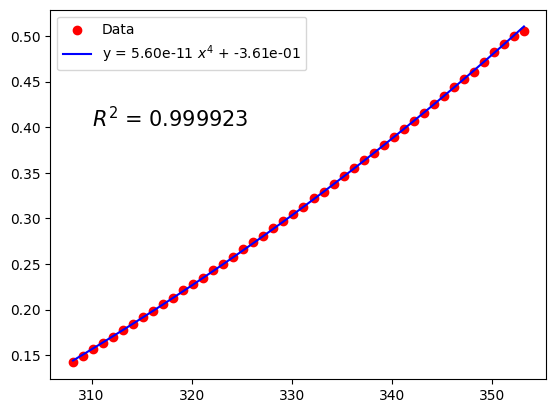

In [37]:
def radiation(x, A, B):
    return A * x ** 4 + B


SIGMA = optimize.curve_fit(radiation, T, V_heimian)[0]
print(SIGMA)

A, B = SIGMA

# calcaulate the R^2
y = radiation(T, A, B)
y_mean = np.mean(V_heimian)
SST = np.sum((V_heimian - y_mean) ** 2)
SSR = np.sum((y - y_mean) ** 2)
R2 = SSR / SST
print('R2 = ', R2)

fig = plt.figure()
plt.scatter(T, V_heimian, label='Data', color='red', marker='o')
plt.plot(T, radiation(T, A, B), label='y = %.2e $x^4$ + %.2e' % (A, B), color='blue')
plt.text(310, 0.4, '$R^2$ = %.6f' % R2, fontsize=15)
plt.legend(loc='best')
plt.show()


[ 8.11086983e-11 -4.67019453e-08  2.59810038e-05 -5.48111798e-03]
R2 =  0.9999552351037329


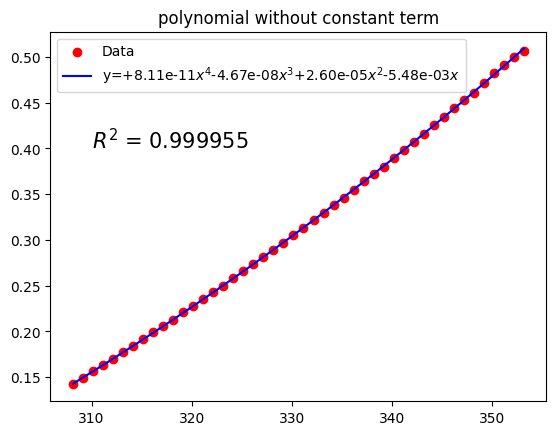

In [38]:
def radiation(x, A, B, C, D):
    return A * x ** 4 + B * x ** 3 + C * x ** 2 + D * x


SIGMA = optimize.curve_fit(radiation, T, V_heimian)[0]
print(SIGMA)

A, B, C, D = SIGMA

# calcaulate the R^2
y = radiation(T, A, B, C, D)
y_mean = np.mean(V_heimian)
SST = np.sum((V_heimian - y_mean) ** 2)
SSR = np.sum((y - y_mean) ** 2)
R2 = SSR / SST
print('R2 = ', R2)


fig = plt.figure()
plt.title('polynomial without constant term')
plt.scatter(T, V_heimian, label='Data', color='red', marker='o')
plt.plot(T, radiation(T, A, B, C, D), label='y=%+.2e$x^4$%+.2e$x^3$%+.2e$x^2$%+.2e$x$' % (A, B, C, D), color='blue')
plt.text(310, 0.4, '$R^2$ = %.6f' % R2, fontsize=15)
plt.legend(loc='best')
plt.show()


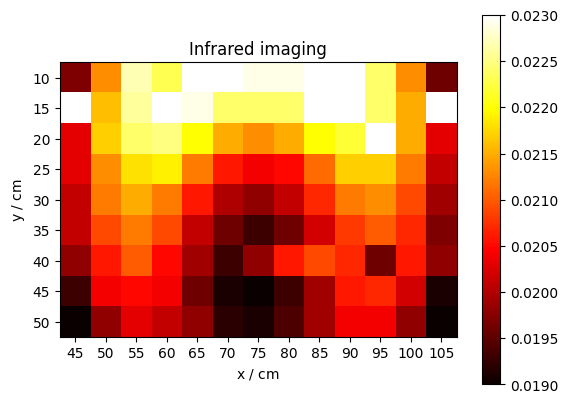

In [ ]:
# Infrared imaging
data = np.array([
    [0.0197, 0.0213, 0.0227, 0.0223, 0.0232, 0.023, 0.0229, 0.0229, 0.0232, 0.0231, 0.0224, 0.0213, 0.0196],
    [0.2, 0.0216, 0.0226, 0.0231, 0.0229, 0.0224, 0.0224, 0.0224, 0.023, 0.0231, 0.0224, 0.0215, 0.2],
    [0.0203, 0.0217, 0.0224, 0.0225, 0.022, 0.0215, 0.0213, 0.0215, 0.022, 0.0222, 0.22, 0.0215, 0.0203],
    [0.0203, 0.0213, 0.0218, 0.0219, 0.0212, 0.0206, 0.0204, 0.0205, 0.0211, 0.0217, 0.0217, 0.0212, 0.0201],
    [0.0201, 0.0212, 0.0215, 0.0212, 0.0206, 0.02, 0.0198, 0.0201, 0.0207, 0.0212, 0.0213, 0.0209, 0.0199],
    [0.0201, 0.0209, 0.0212, 0.0209, 0.0201, 0.0196, 0.0193, 0.0196, 0.0202, 0.0208, 0.021, 0.0207, 0.0197],
    [0.0198, 0.0206, 0.021, 0.0205, 0.0199, 0.0193, 0.0198, 0.0206, 0.0209, 0.0207, 0.0196, 0.0206, 0.0198],
    [0.0193, 0.0204, 0.0205, 0.0204, 0.0196, 0.0191, 0.019, 0.0193, 0.0199, 0.0206, 0.0207, 0.0202, 0.0191],
    [0.0189, 0.0198, 0.0203, 0.0201, 0.0198, 0.0192, 0.0191, 0.0194, 0.0199, 0.0204, 0.0204, 0.0198, 0.0187]
])


fig, ax = plt.subplots()
# colormap
ax.set_title('Infrared imaging')

ax.set_xlabel('x / $\mathrm{cm}$')
ax.set_xticks(np.arange(0, 13, 1))
ax.set_xticklabels([45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105])

ax.set_ylabel('y / $\mathrm{cm}$')
ax.set_yticks(np.arange(0, 9, 1))
ax.set_yticklabels([10, 15, 20, 25, 30, 35, 40, 45, 50])

im = ax.imshow(data, cmap='hot', interpolation='nearest', vmin=0.019, vmax=0.023)
# cbar
cbar = ax.figure.colorbar(im, ax=ax)
